In [131]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,recall_score,precision_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('BikeBuyers.csv')

In [3]:
data.head()

YearlyIncome  TotalChildren  NumberChildrenAtHome EnglishEducation  \
0         90000              2                     0        Bachelors   
1         60000              3                     3        Bachelors   
2         60000              3                     3        Bachelors   
3         70000              0                     0        Bachelors   
4         80000              5                     5        Bachelors   

   NumberCarsOwned CommuteDistance  Age  BikeBuyer  
0                0       1-2 Miles   49          1  
1                1       0-1 Miles   50          1  
2                1       2-5 Miles   50          1  
3                1      5-10 Miles   47          1  
4                4       1-2 Miles   47          1

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18484 entries, 0 to 18483
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   YearlyIncome          18484 non-null  int64 
 1   TotalChildren         18484 non-null  int64 
 2   NumberChildrenAtHome  18484 non-null  int64 
 3   EnglishEducation      18484 non-null  object
 4   NumberCarsOwned       18484 non-null  int64 
 5   CommuteDistance       18484 non-null  object
 6   Age                   18484 non-null  int64 
 7   BikeBuyer             18484 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
data.isna().sum()

YearlyIncome            0
TotalChildren           0
NumberChildrenAtHome    0
EnglishEducation        0
NumberCarsOwned         0
CommuteDistance         0
Age                     0
BikeBuyer               0
dtype: int64

In [6]:
data.shape

(18484, 8)

In [7]:
data = pd.get_dummies(data)

In [8]:
data.shape

(18484, 16)

In [9]:
x = data.drop('BikeBuyer',axis = 1)
y = data['BikeBuyer']

In [10]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3)

In [118]:
#default svm
model = RandomForestClassifier(verbose=1,max_depth=10000)
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10000,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 1,
 'warm_start': False}

In [119]:
model.fit(xtrain,ytrain)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s


RandomForestClassifier(max_depth=10000, verbose=1)

In [120]:
model.score(xtest,ytest)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


0.7793003966822936

In [124]:
preds = model.predict(xtest)
true = ytest

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


In [129]:
f1_score(preds,true),recall_score(preds,true),precision_score(preds,true)

(0.7744194618503502, 0.7729948491537896, 0.7758493353028065)

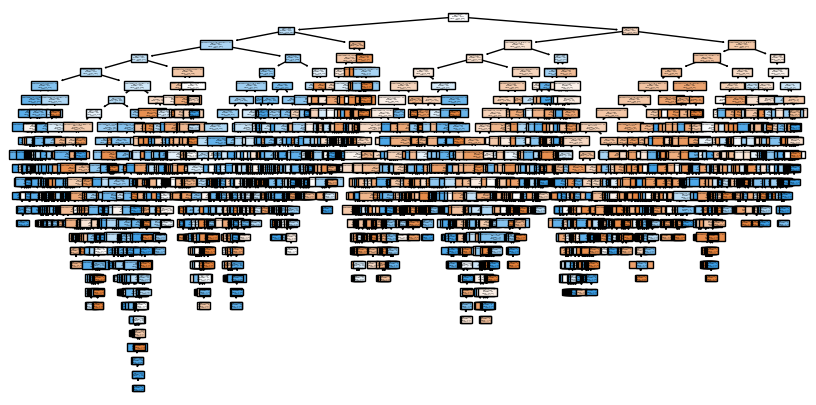

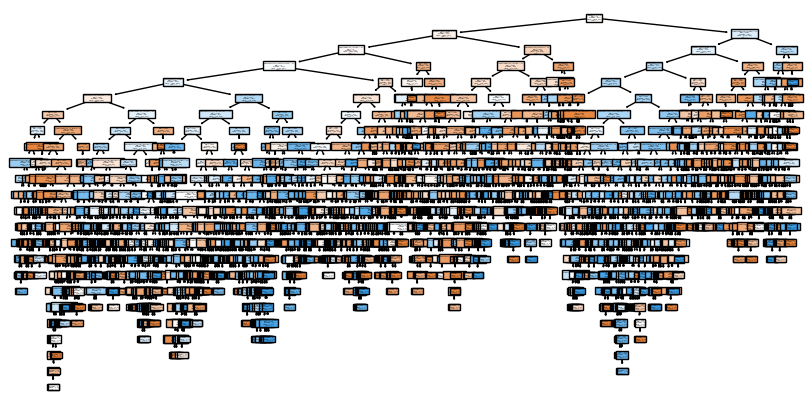

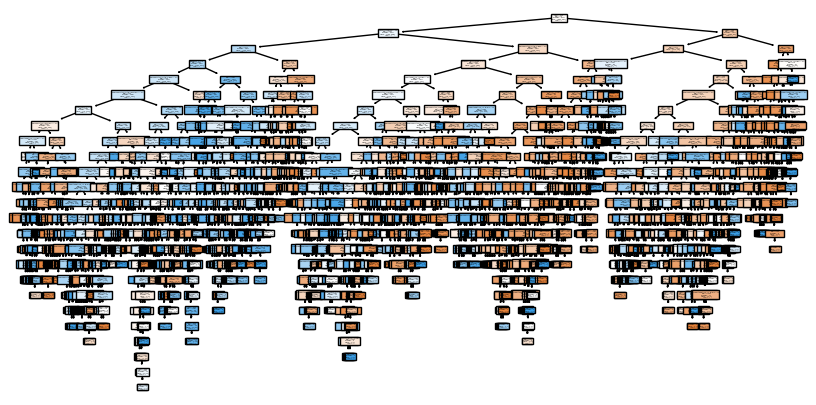

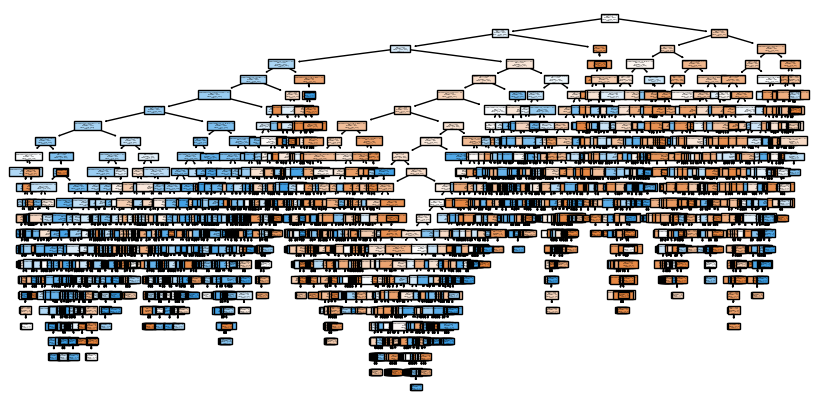

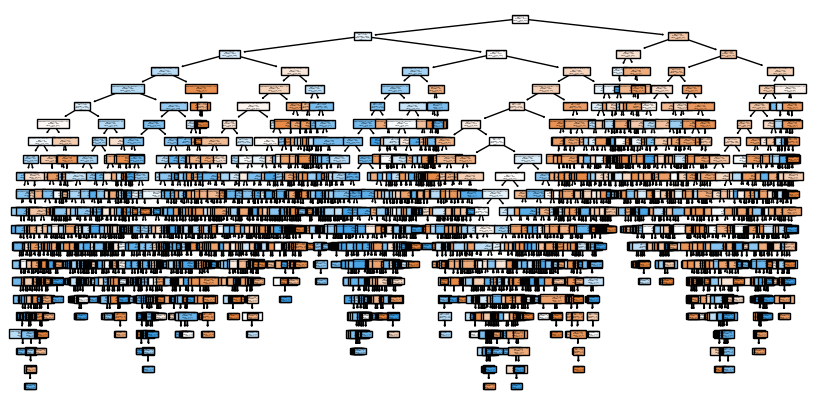

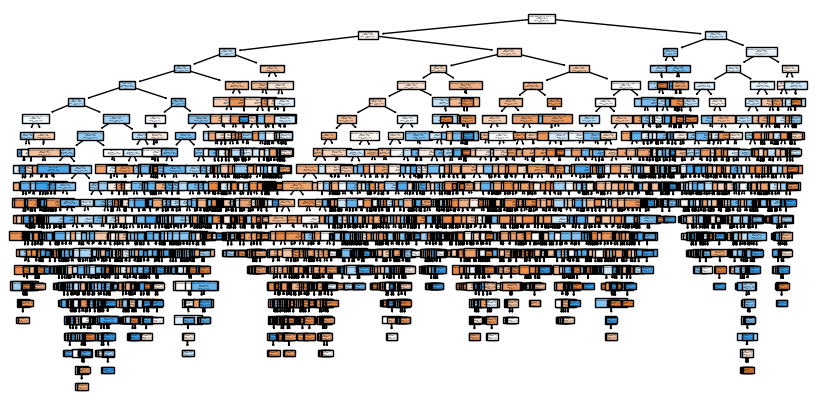

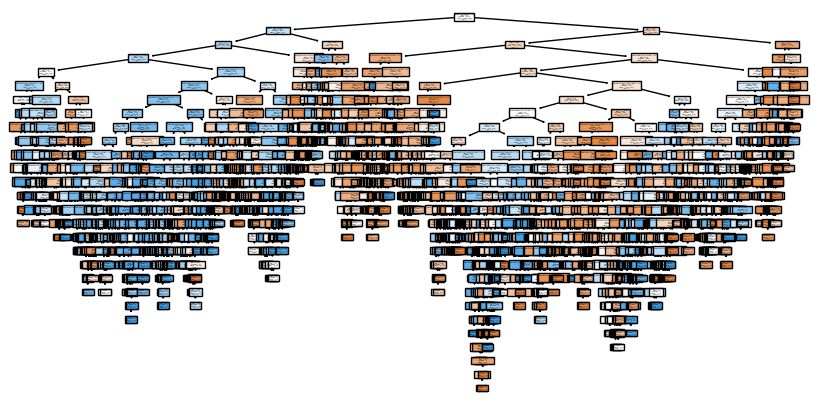

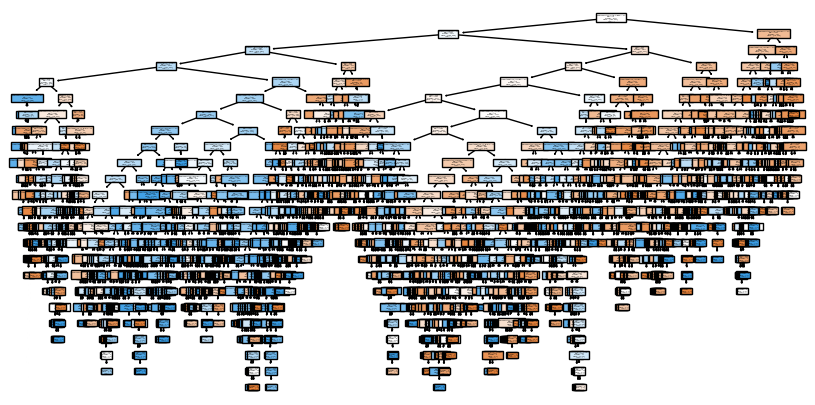

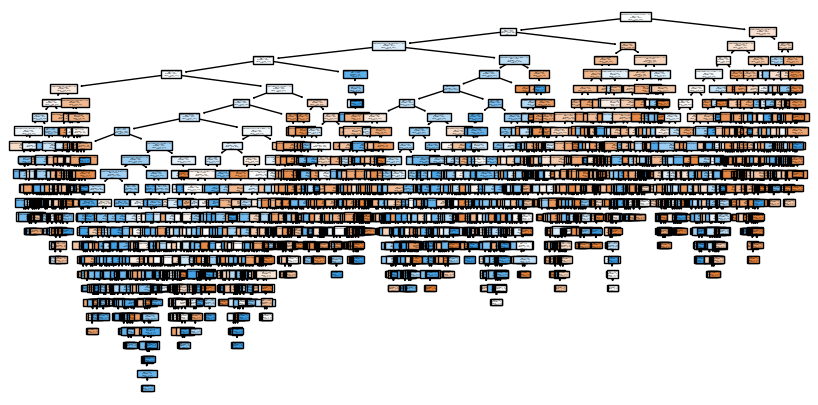

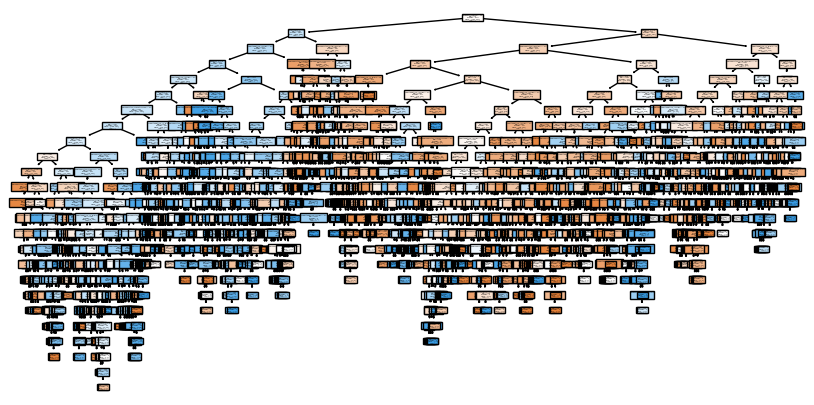

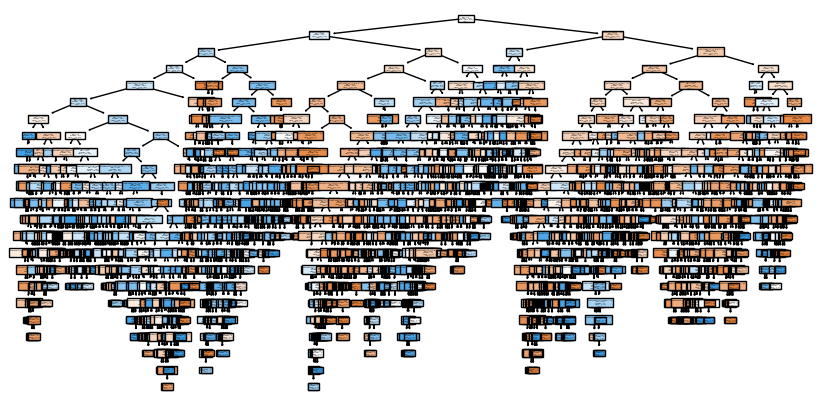

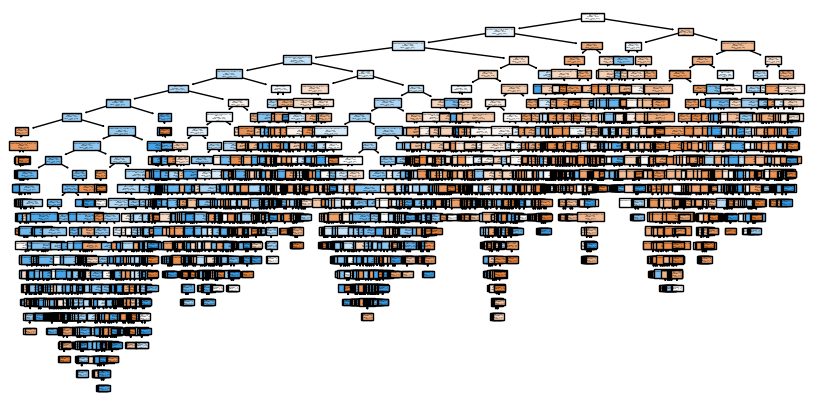

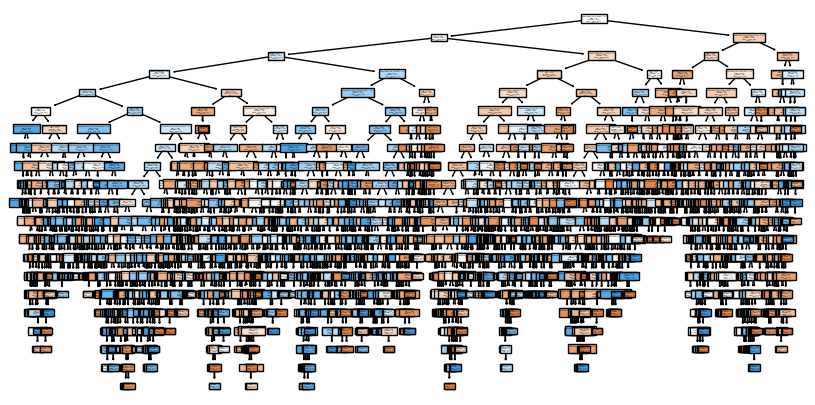

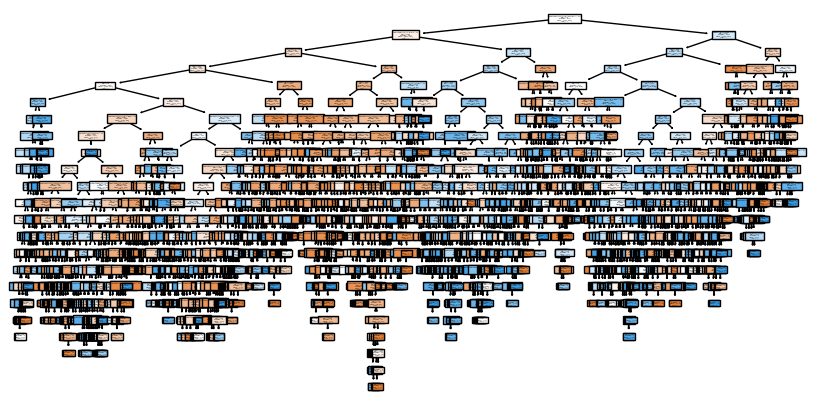

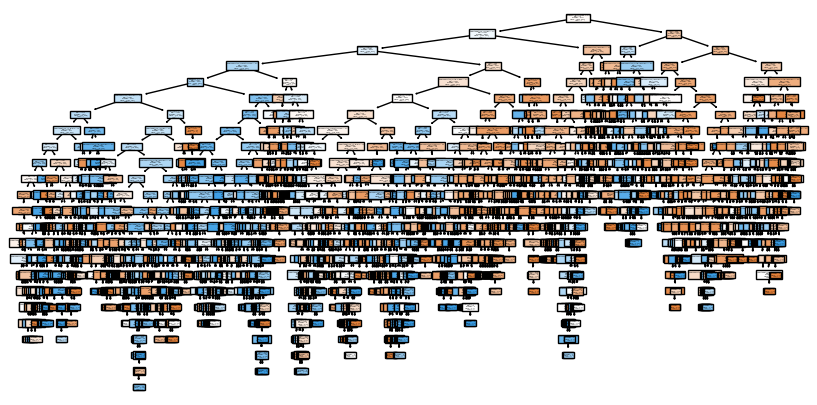

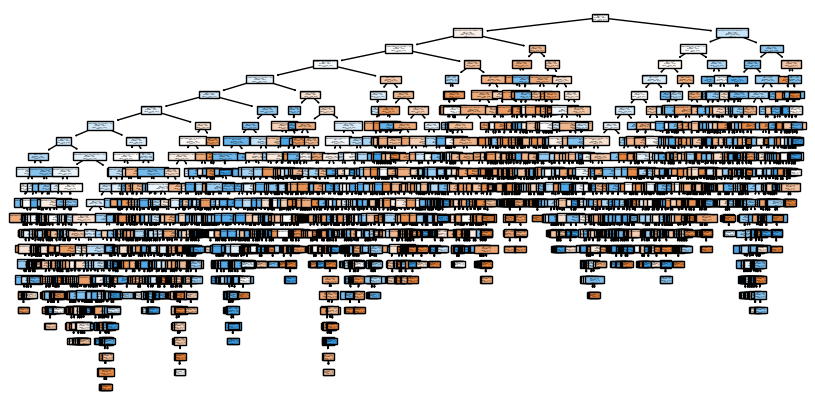

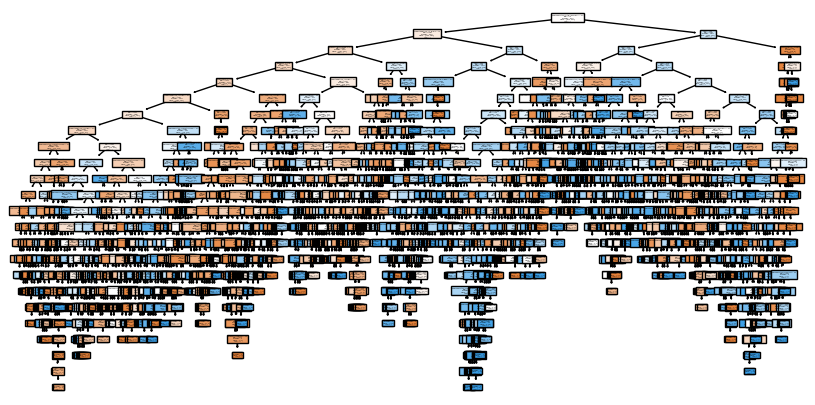

KeyboardInterrupt: 

In [139]:
targ = list(data.BikeBuyer)
targ = [str(x) for x in targ]

for tree_index, tree in enumerate(model.estimators_):
    plt.figure(figsize=(10, 5))
    plt.title(f"Decision Tree {tree_index}")
    plot_tree(tree, filled=True, feature_names=data.columns, class_names=targ)
    plt.show()

